<a href="https://colab.research.google.com/github/mohd-faizy/2_Project_Image_Classification_with_CNNs_using_Keras/blob/master/2_Project_Image_Classification_with_CNN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [0]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


# Task 2: Preprocess Data

In [0]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)


    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 13s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

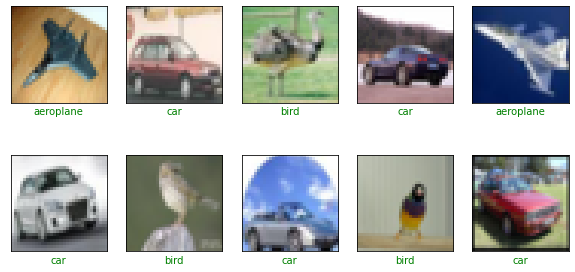

In [0]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
    
    
show_random_examples(x_train, y_train, y_train)

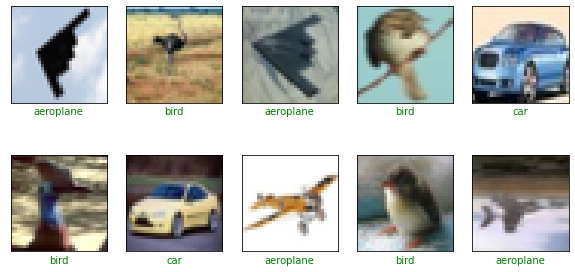

In [0]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32, 32, 3))) # Check -- its not input()-- Input() is used to instantiate a Keras tensor

    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(3 , activation = 'softmax'))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer = 'adam', 
        metrics = ['accuracy']
        )

    return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

# Task 5: Train the Model

In [0]:
h = model.fit(
    x_train/225., y_train,
    validation_data = (x_train/225., y_train),
    epochs = 10, batch_size = 128,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3),
        tf.keras.callbacks.ModelCheckpoint(
            '/content/models/model_{val_accuracy:.3f}.h5',
            save_best_only = True, save_weights_only = False,
            moniter = 'val_accuracy'
                 )
                
    ]
)

Epoch 1/10
118/118 [==============================] - 3s 27ms/step - loss: 0.8551 - accuracy: 0.6829 - val_loss: 2.8522 - val_accuracy: 0.3613
Epoch 2/10
118/118 [==============================] - 3s 23ms/step - loss: 0.5509 - accuracy: 0.7751 - val_loss: 3.9669 - val_accuracy: 0.3333
Epoch 3/10
118/118 [==============================] - 3s 23ms/step - loss: 0.4880 - accuracy: 0.8043 - val_loss: 3.6238 - val_accuracy: 0.3333
Epoch 4/10
118/118 [==============================] - 3s 23ms/step - loss: 0.4579 - accuracy: 0.8163 - val_loss: 2.1635 - val_accuracy: 0.4233
Epoch 5/10
118/118 [==============================] - 3s 23ms/step - loss: 0.4138 - accuracy: 0.8371 - val_loss: 1.4196 - val_accuracy: 0.5130
Epoch 6/10
118/118 [==============================] - 3s 23ms/step - loss: 0.3814 - accuracy: 0.8501 - val_loss: 0.5803 - val_accuracy: 0.7758
Epoch 7/10
118/118 [==============================] - 3s 23ms/step - loss: 0.3492 - accuracy: 0.8634 - val_loss: 0.5743 - val_accuracy: 0.7918

__How to Check-Point Deep Learning Models in Keras__

- [tf.keras.callbacks.ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)

- [Checkpointing Neural Network Models](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)

# Task 6: Final Predictions

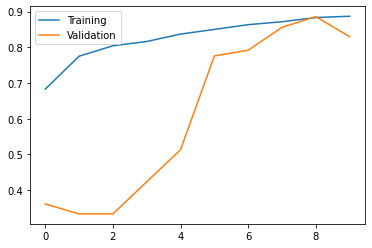

In [0]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label ='Validation')
plt.legend()
plt.show()

In [0]:
model = tf.keras.models.load_model('/content/models/model_0.886.h5')

In [0]:
preds = model.predict(x_test/255.)

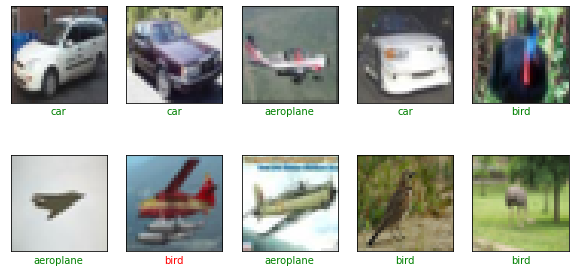

In [0]:
show_random_examples(x_test, y_test, preds)